In [16]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading full dataframe
final_df = pd.read_csv('final_df.csv')

In [3]:
final_df

,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Crazy - Single Version,"Patsy Cline, The Jordanaires",3zpj9dvJABiyMrmLCPw6i8,0.471,0.021,10,-24.385,1,0.0366,0.931000,0.000001,0.1030,0.3560,107.796
1,Folsom Prison Blues,"Johnny Cash, The Tennessee Two",121sjkub4p4zcFNozkKnQD,0.754,0.540,5,-8.326,1,0.0266,0.687000,0.000075,0.0868,0.7900,101.738
2,I Will Always Love You,Dolly Parton,6nRvgo4ySezQKD1D7NIqAu,0.446,0.142,9,-13.498,1,0.0335,0.960000,0.001140,0.1010,0.1560,135.724
3,Springsteen,Eric Church,05ZACkzW8YbRq3eFgIfSNB,0.692,0.809,2,-5.935,1,0.0255,0.100000,0.000098,0.1850,0.9270,104.023
4,He Stopped Loving Her Today,George Jones,6qMgx8ys4MNNxypaIvbG0i,0.430,0.173,8,-18.597,1,0.0321,0.594000,0.000111,0.2240,0.3650,72.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,Afterhour,Carlo Ruetz,2Sh9tvtvR7rmnBpeQ7KbPu,0.776,0.972,1,-6.503,1,0.0421,0.001580,0.917000,0.1110,0.1970,128.017
8965,Latex,Monika Kruse,7Lp0NobaOnTfqcHPjVXzA6,0.797,0.846,1,-7.033,0,0.0839,0.000125,0.952000,0.1190,0.0325,129.005
8966,Whisper,Anna Reusch,0j8iHPirDSkD5nUQw9XzRF,0.791,0.938,10,-7.155,0,0.0518,0.000238,0.917000,0.1110,0.0665,132.004
8967,Mother Earth - Original Mix,Fatima Hajji,4U29PAbl99xuzW3JWSX0u0,0.575,0.998,10,-5.957,0,0.0792,0.000063,0.685000,0.2700,0.6710,134.993


In [6]:
# dataframe for only audio features
X = final_df.drop(columns=['title','artist','id'])

In [7]:
# scaling the audio features dataframe
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.471,0.021,10,-24.385,1,0.0366,0.931,0.000001,0.1030,0.356,107.796
1,0.754,0.540,5,-8.326,1,0.0266,0.687,0.000075,0.0868,0.790,101.738
2,0.446,0.142,9,-13.498,1,0.0335,0.960,0.001140,0.1010,0.156,135.724
3,0.692,0.809,2,-5.935,1,0.0255,0.100,0.000098,0.1850,0.927,104.023
4,0.430,0.173,8,-18.597,1,0.0321,0.594,0.000111,0.2240,0.365,72.103


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.202856,-3.543413,1.224218,-4.305835,0.841654,-1.006131,3.270913,-0.364682,-0.641196,-1.014750,-0.189245
1,0.647778,-0.857851,-0.144144,-0.200479,0.841654,-1.078264,2.223109,-0.364358,-0.740244,1.000354,-0.392573
2,-1.366340,-2.917299,0.950545,-1.522660,0.841654,-1.028493,3.395447,-0.359694,-0.653424,-1.943370,0.748119
3,0.242339,0.534088,-0.965161,0.410761,0.841654,-1.086199,-0.297632,-0.364259,-0.139843,1.636459,-0.315880
4,-1.470970,-2.756890,0.676873,-2.826179,0.841654,-1.038591,1.823741,-0.364201,0.098606,-0.972962,-1.387230


In [8]:
# setting up clusters
kmeans = KMeans(n_clusters=10, random_state=345)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=10, random_state=345)

In [15]:
kmeans.inertia_

48827.80935478889

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

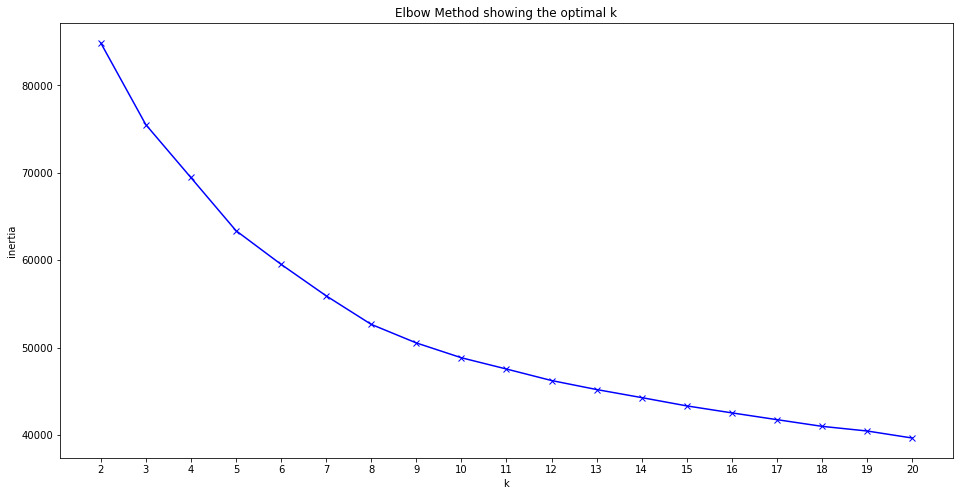

In [18]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=345)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [19]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=345)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

FileNotFoundError: [Errno 2] No such file or directory: 'Model/kmeans_2.pickle'